In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

import utils
import methodprops
import plot_functions as fplot

In [2]:
resdir = "../dsc/results/"

blockdiag_pkl = os.path.join(resdir, "linreg_blockdiag.pkl")
indep_pkl = os.path.join(resdir, "linreg_indep.pkl")

blockdiag_df = pd.read_pickle(blockdiag_pkl)
indep_df     = pd.read_pickle(indep_pkl)

sparse_blockdiag_df = blockdiag_df[blockdiag_df['simulate.sfix'] != 250]
sparse_indep_df     = indep_df[indep_df['simulate.sfix'] != 250]

In [3]:
blockdiag_df

,simulate,simulate.dims,simulate.sfix,simulate.pve,fit,DSC,mse,coef_mse,niter,elbo,runtime_wall,runtime_cpu,runtime_dsc,convergence
0,blockdiag,"(500,10000)",5,0.4,mr_ash,1,1.403151,0.000245,76,844.653049,5.438000,5.281000,5.461000,1
1,blockdiag,"(500,10000)",5,0.4,mr_ash,2,2.635541,0.000139,79,969.101160,5.972000,5.818000,6.011000,1
2,blockdiag,"(500,10000)",5,0.4,mr_ash,3,31.525408,0.000925,113,1606.348835,8.285000,8.038000,8.311000,1
3,blockdiag,"(500,10000)",5,0.4,mr_ash,4,1.856908,0.000349,92,871.417446,6.676000,6.480000,6.697000,1
4,blockdiag,"(500,10000)",5,0.4,mr_ash,5,6.939380,0.000286,106,1179.602637,7.530000,7.395000,7.550000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,blockdiag,"(500,10000)",250,0.8,gradvi_compound_lasso_init,6,107.244384,0.030821,127,1923.222862,66.427997,175.974400,66.429179,1
716,blockdiag,"(500,10000)",250,0.8,gradvi_compound_lasso_init,7,137.484076,0.036880,109,2007.242761,73.905433,163.857218,73.906485,1
717,blockdiag,"(500,10000)",250,0.8,gradvi_compound_lasso_init,8,36.216312,0.031738,93,1682.805137,67.788533,146.356229,67.789793,1
718,blockdiag,"(500,10000)",250,0.8,gradvi_compound_lasso_init,9,53.083256,0.028997,94,1784.262569,69.125545,144.990796,69.126634,1


In [4]:
primary_keys = ['simulate', 'simulate.dims', 'simulate.sfix', 'simulate.pve']
secondary_keys = ['DSC']
unique_keys = ['simulate.sfix', 'simulate.pve']

reference = 'mr_ash_lasso_init'
targets = ['mr_ash', 'gradvi_compound', 'gradvi_direct', 'gradvi_compound_lasso_init', 'gradvi_direct_lasso_init']

# ELBO comparison plots

[-55.0, 55.0]


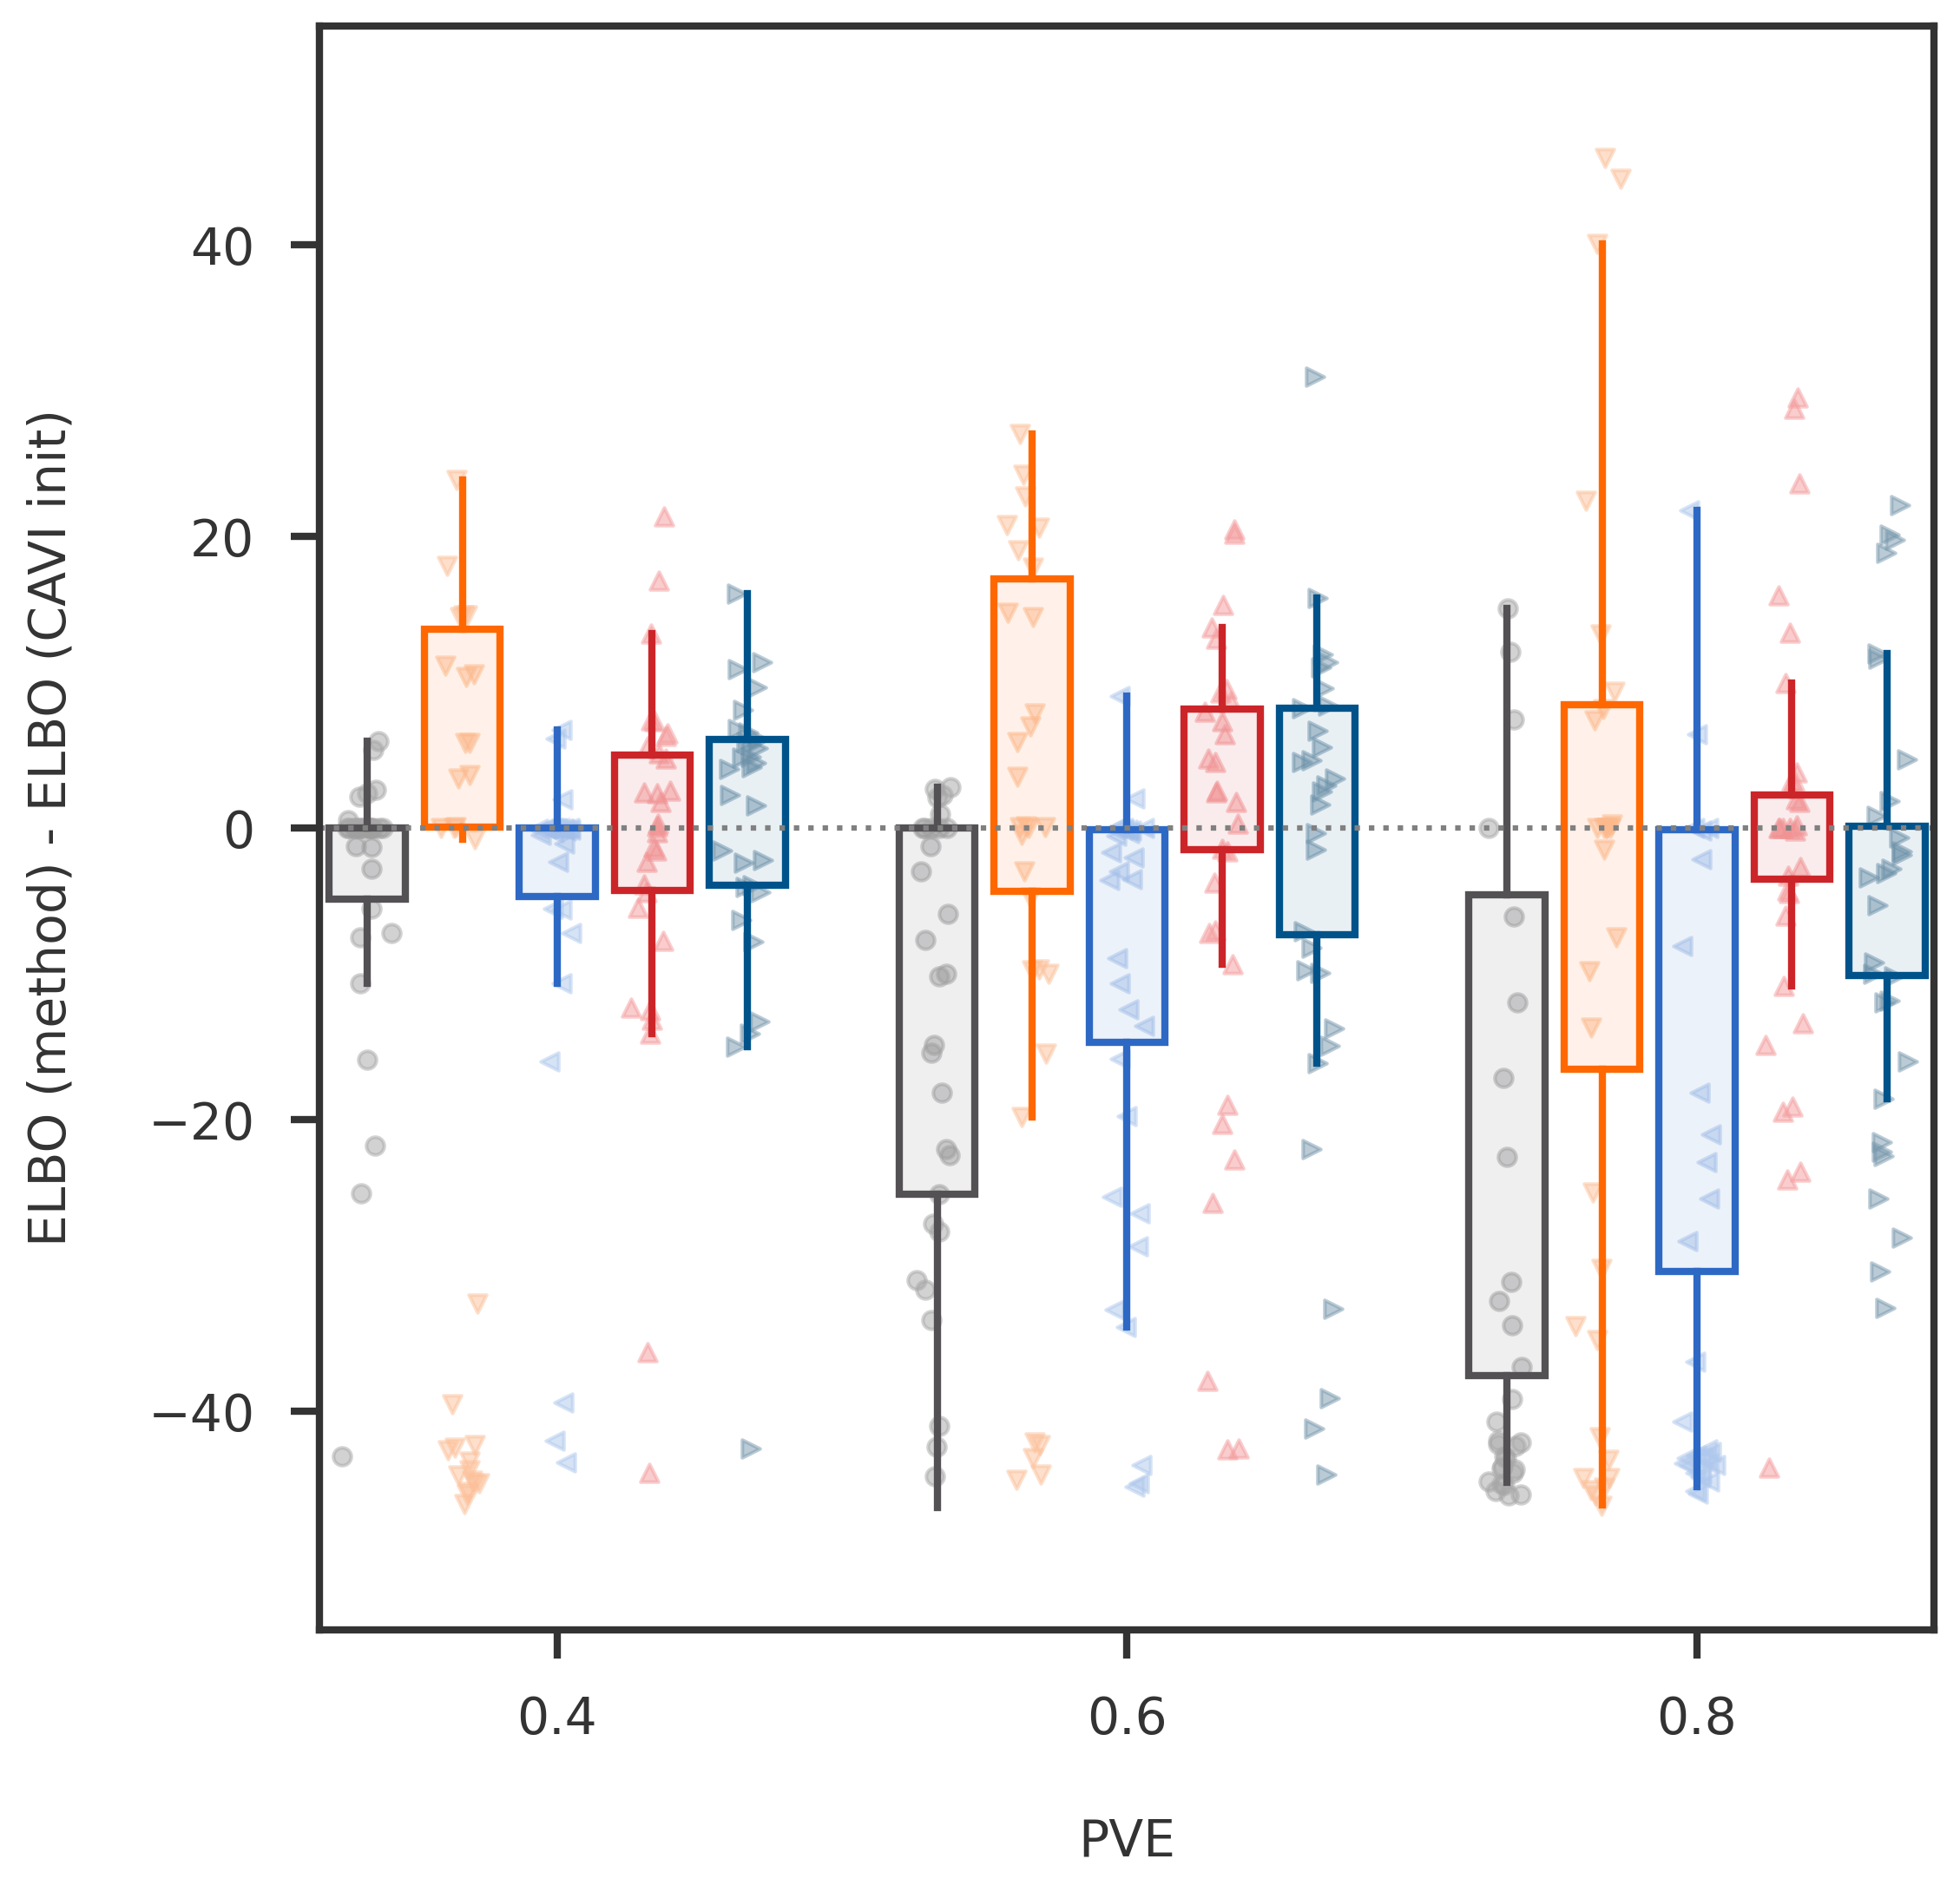

In [5]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

plotprefix = "blockdiag_elbo_comparison_boxplot"
ylim = [-55.0, 55.0]

fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)
remove_outliers = True

df = utils.pivot_simulation_stat(sparse_blockdiag_df, 'elbo')
dfmod = df.copy(deep = True)
for target in targets:
    dfmod[target] = -1. * (dfmod[target] - dfmod[reference])

outliers = fplot.compare_methods_with_boxplots(ax1, dfmod, targets, ylim = ylim)

ax1.axhline(y = 0, linestyle = 'dotted', color = 'gray')
ax1.set_ylabel("ELBO (method) - ELBO (CAVI init)")
ax1.set_xlabel("PVE")
ax1.set_ylim(ylim)
print (ylim)

utils.saveplot(fig, plotprefix)
plt.show()

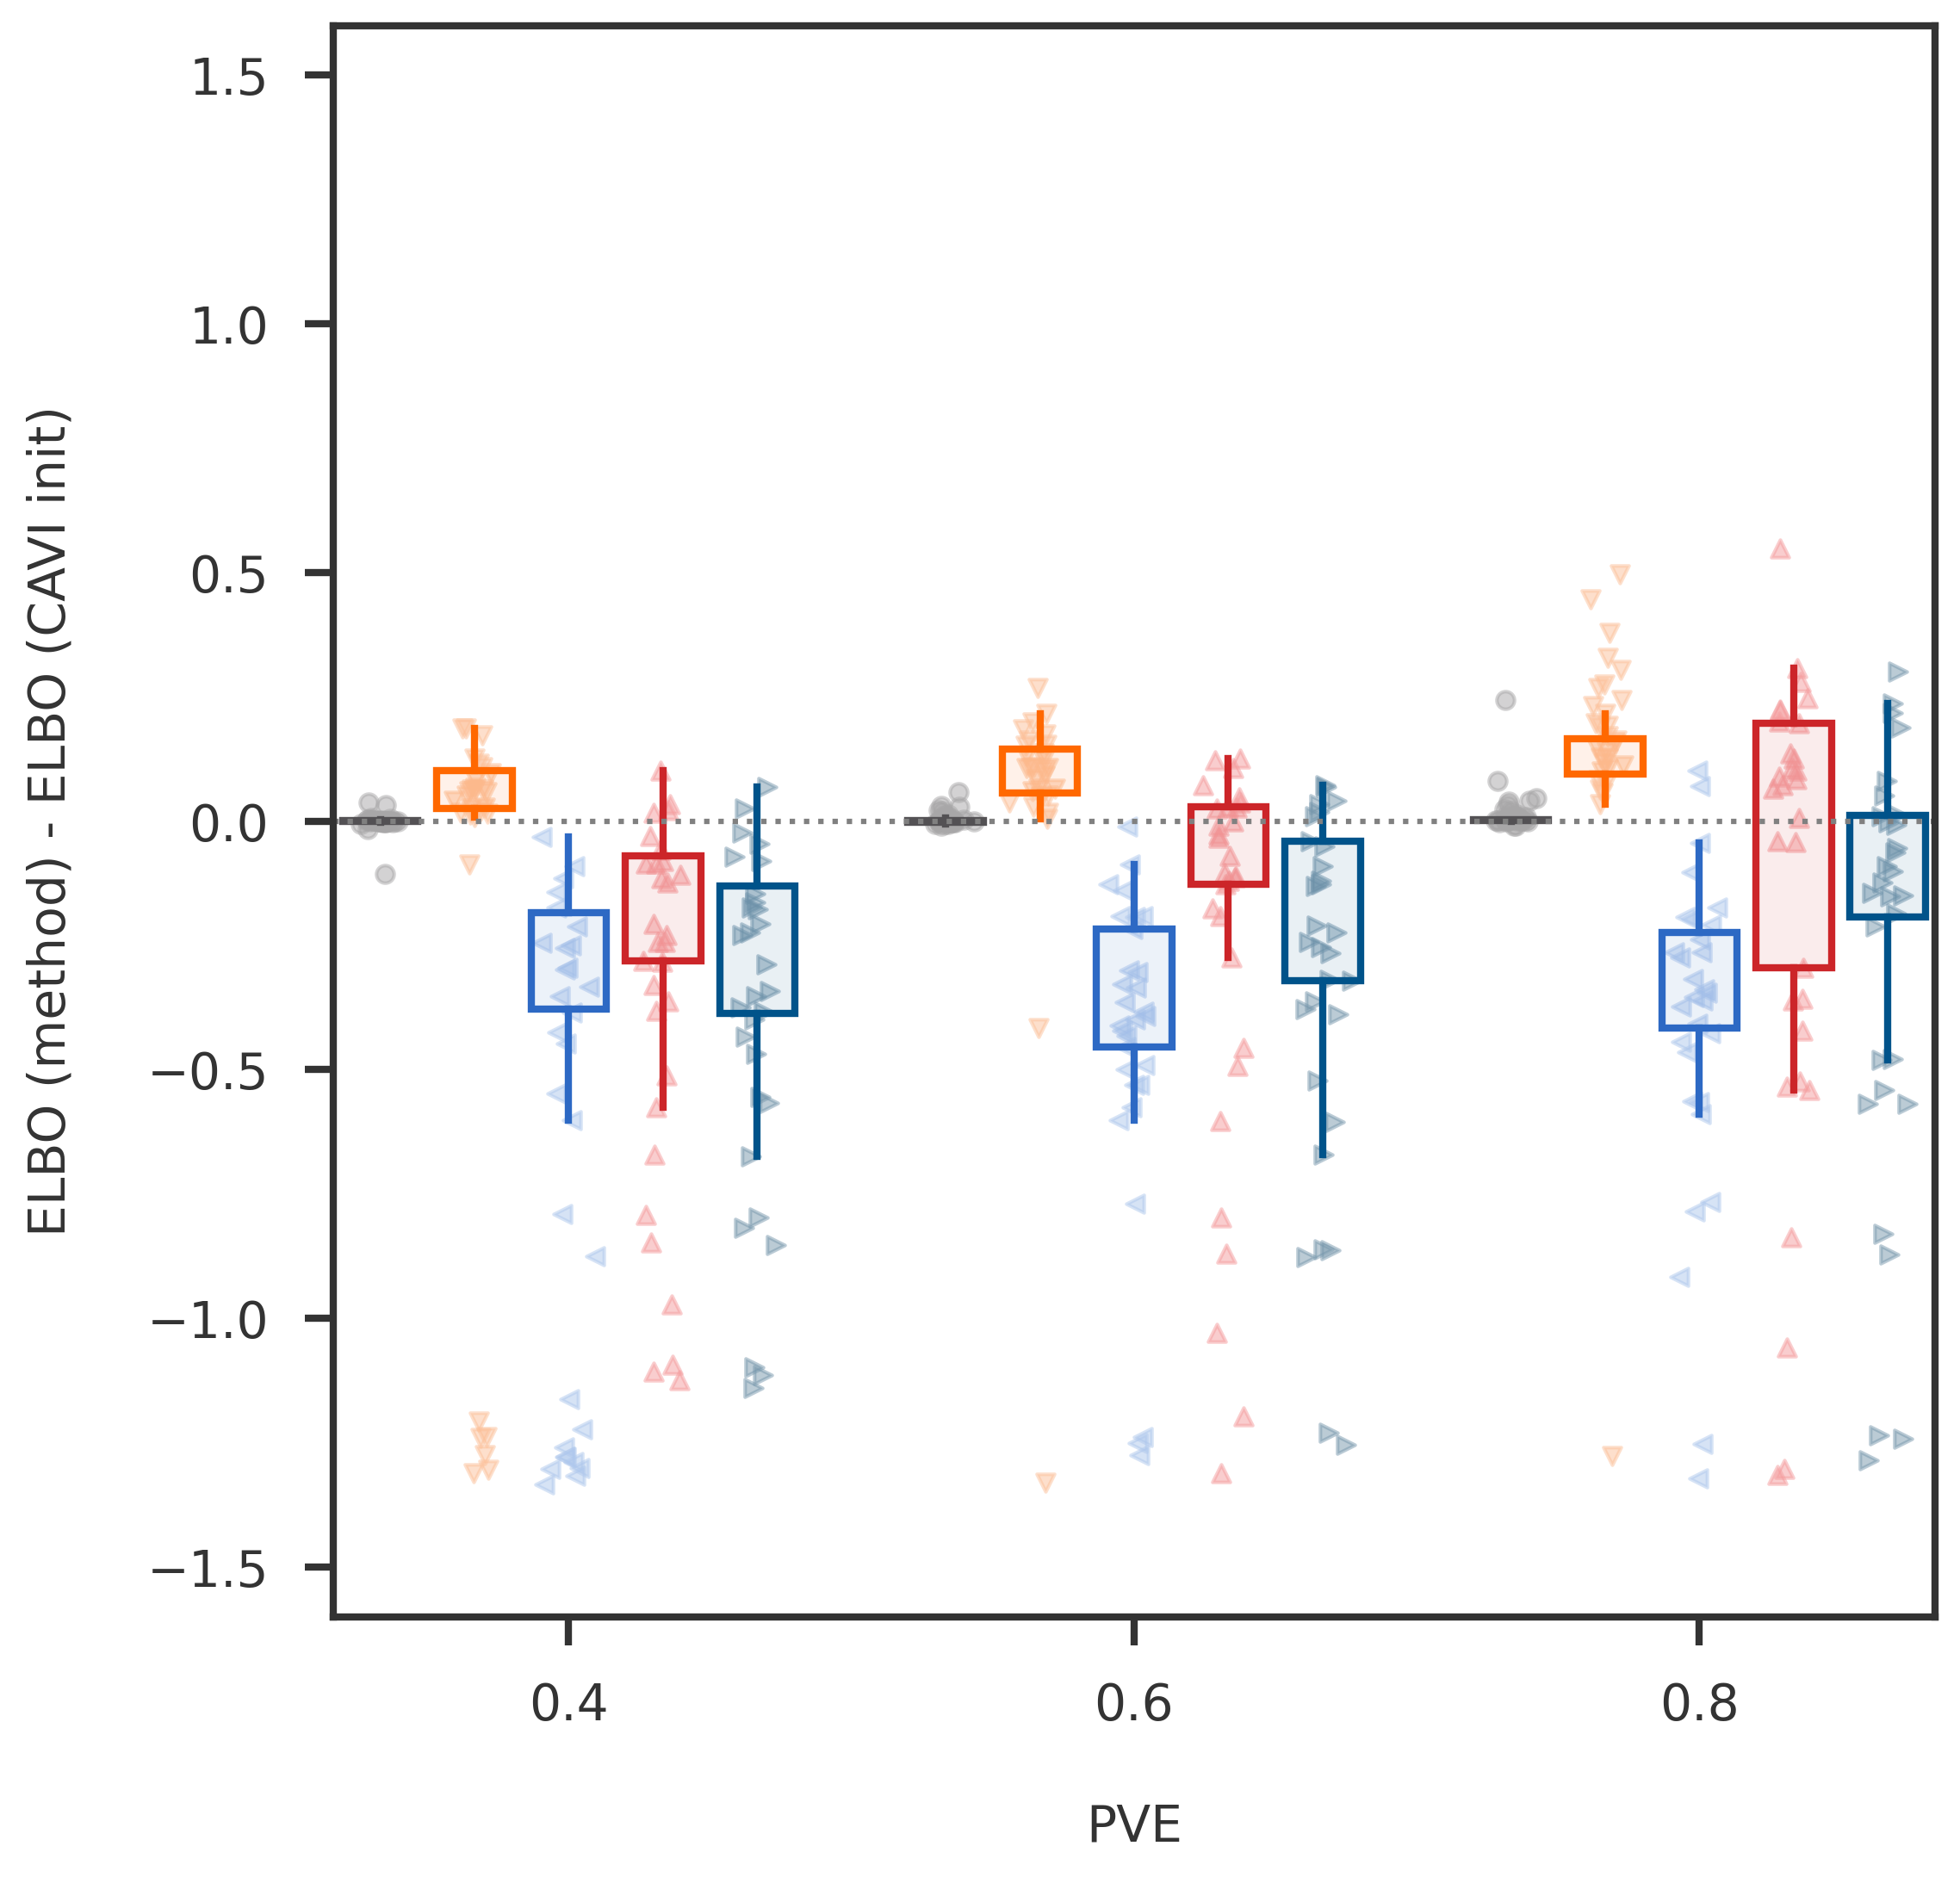

In [6]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

plotprefix = "indep_elbo_comparison_indep"
ylim = [-1.6, 1.6]

fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)
remove_outliers = True

df = utils.pivot_simulation_stat(sparse_indep_df, 'elbo')
dfmod = df.copy(deep = True)
for target in targets:
    dfmod[target] = -1. * (dfmod[target] - dfmod[reference])

outliers = fplot.compare_methods_with_boxplots(ax1, dfmod, targets, ylim = ylim)

ax1.axhline(y = 0, linestyle = 'dotted', color = 'gray')
ax1.set_ylabel("ELBO (method) - ELBO (CAVI init)")
ax1.set_xlabel("PVE")
ax1.set_ylim(ylim)

utils.saveplot(fig, plotprefix)
plt.show()

# RMSE comparison plots

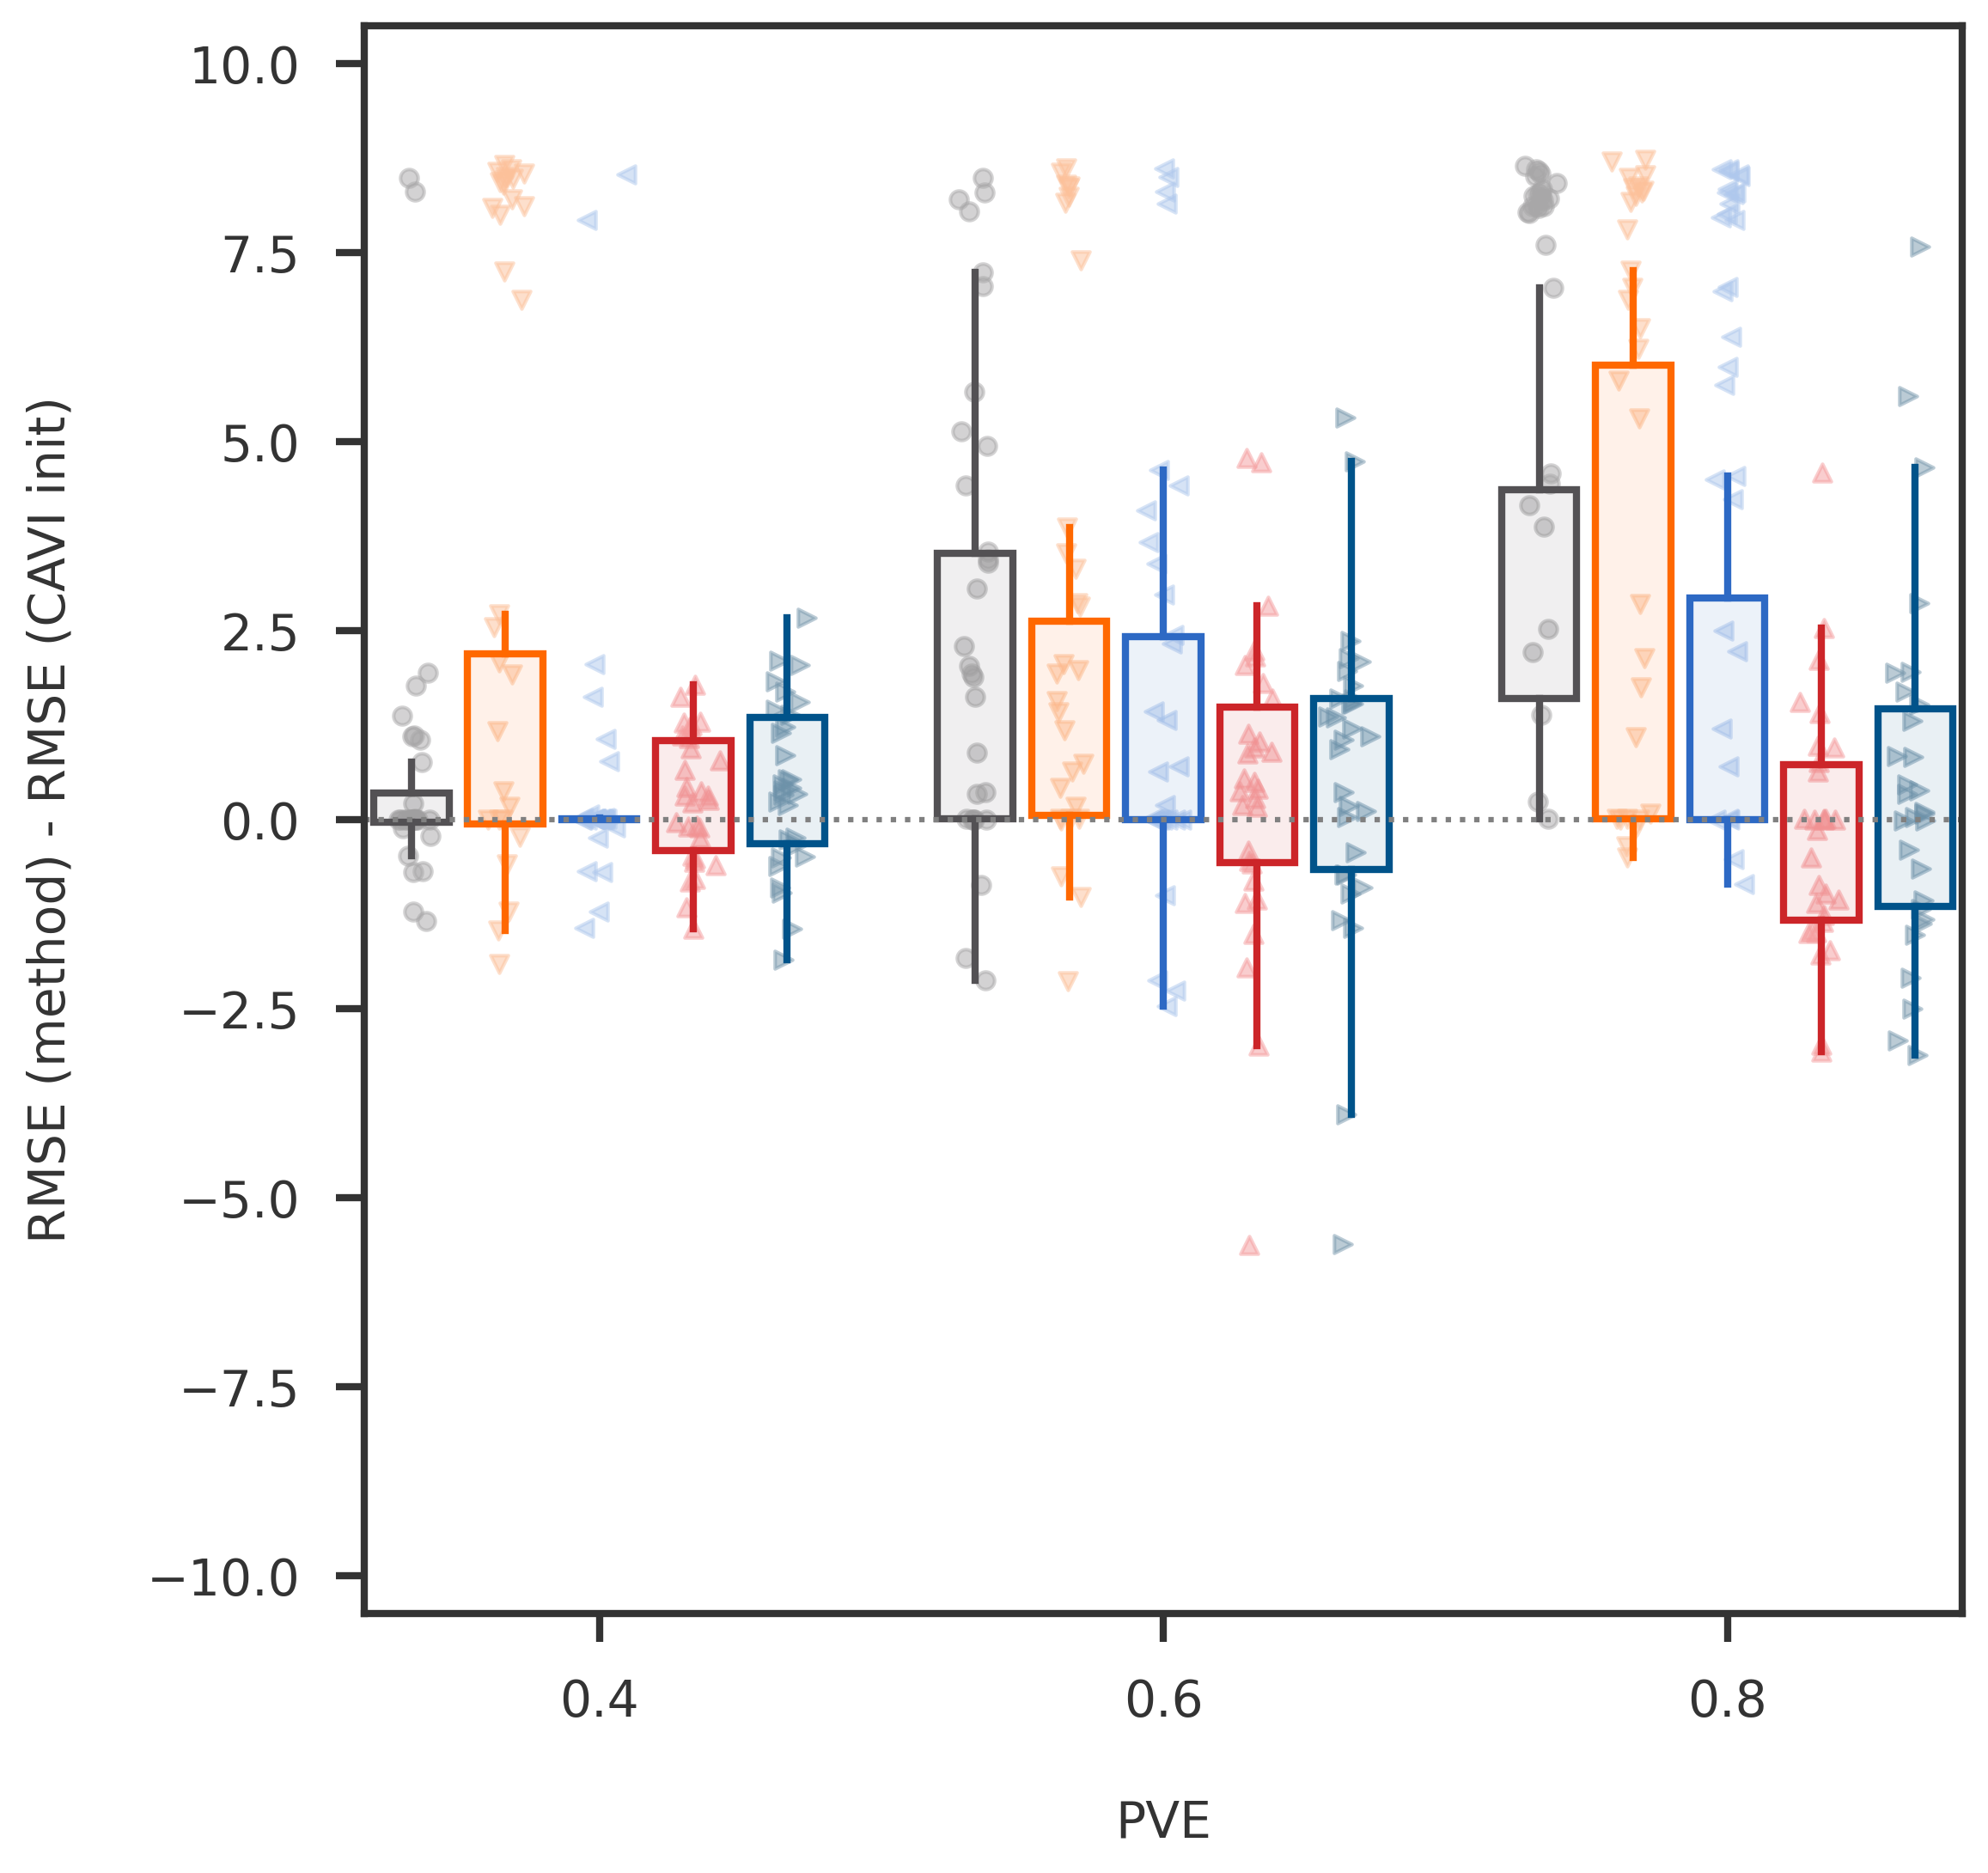

In [7]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

plotprefix = "blockdiag_rmse_comparison_boxplot"
ylim = [-10.5, 10.5]

fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)
remove_outliers = True

df = utils.pivot_simulation_stat(sparse_blockdiag_df, 'mse')
dfmod = df.copy(deep = True)
dfmod[reference] = np.sqrt(dfmod[reference])
for target in targets:
    dfmod[target] = 100 * (np.sqrt(dfmod[target]) - dfmod[reference]) / dfmod[reference]

outlier_factor = [10. for x in targets]
outlier_factor[0] = 0.8
outlier_factor[1] = 0.4
outlier_factor[2] = 0.9
outliers = fplot.compare_methods_with_boxplots(ax1, dfmod, targets, outlier_factor = outlier_factor, ylim = ylim)

ax1.axhline(y = 0, linestyle = 'dotted', color = 'gray')
ax1.set_ylabel("RMSE (method) - RMSE (CAVI init)")
ax1.set_xlabel("PVE")
ax1.set_ylim(ylim)
ax1.axhline(y = 10.5)

utils.saveplot(fig, plotprefix)
plt.show()

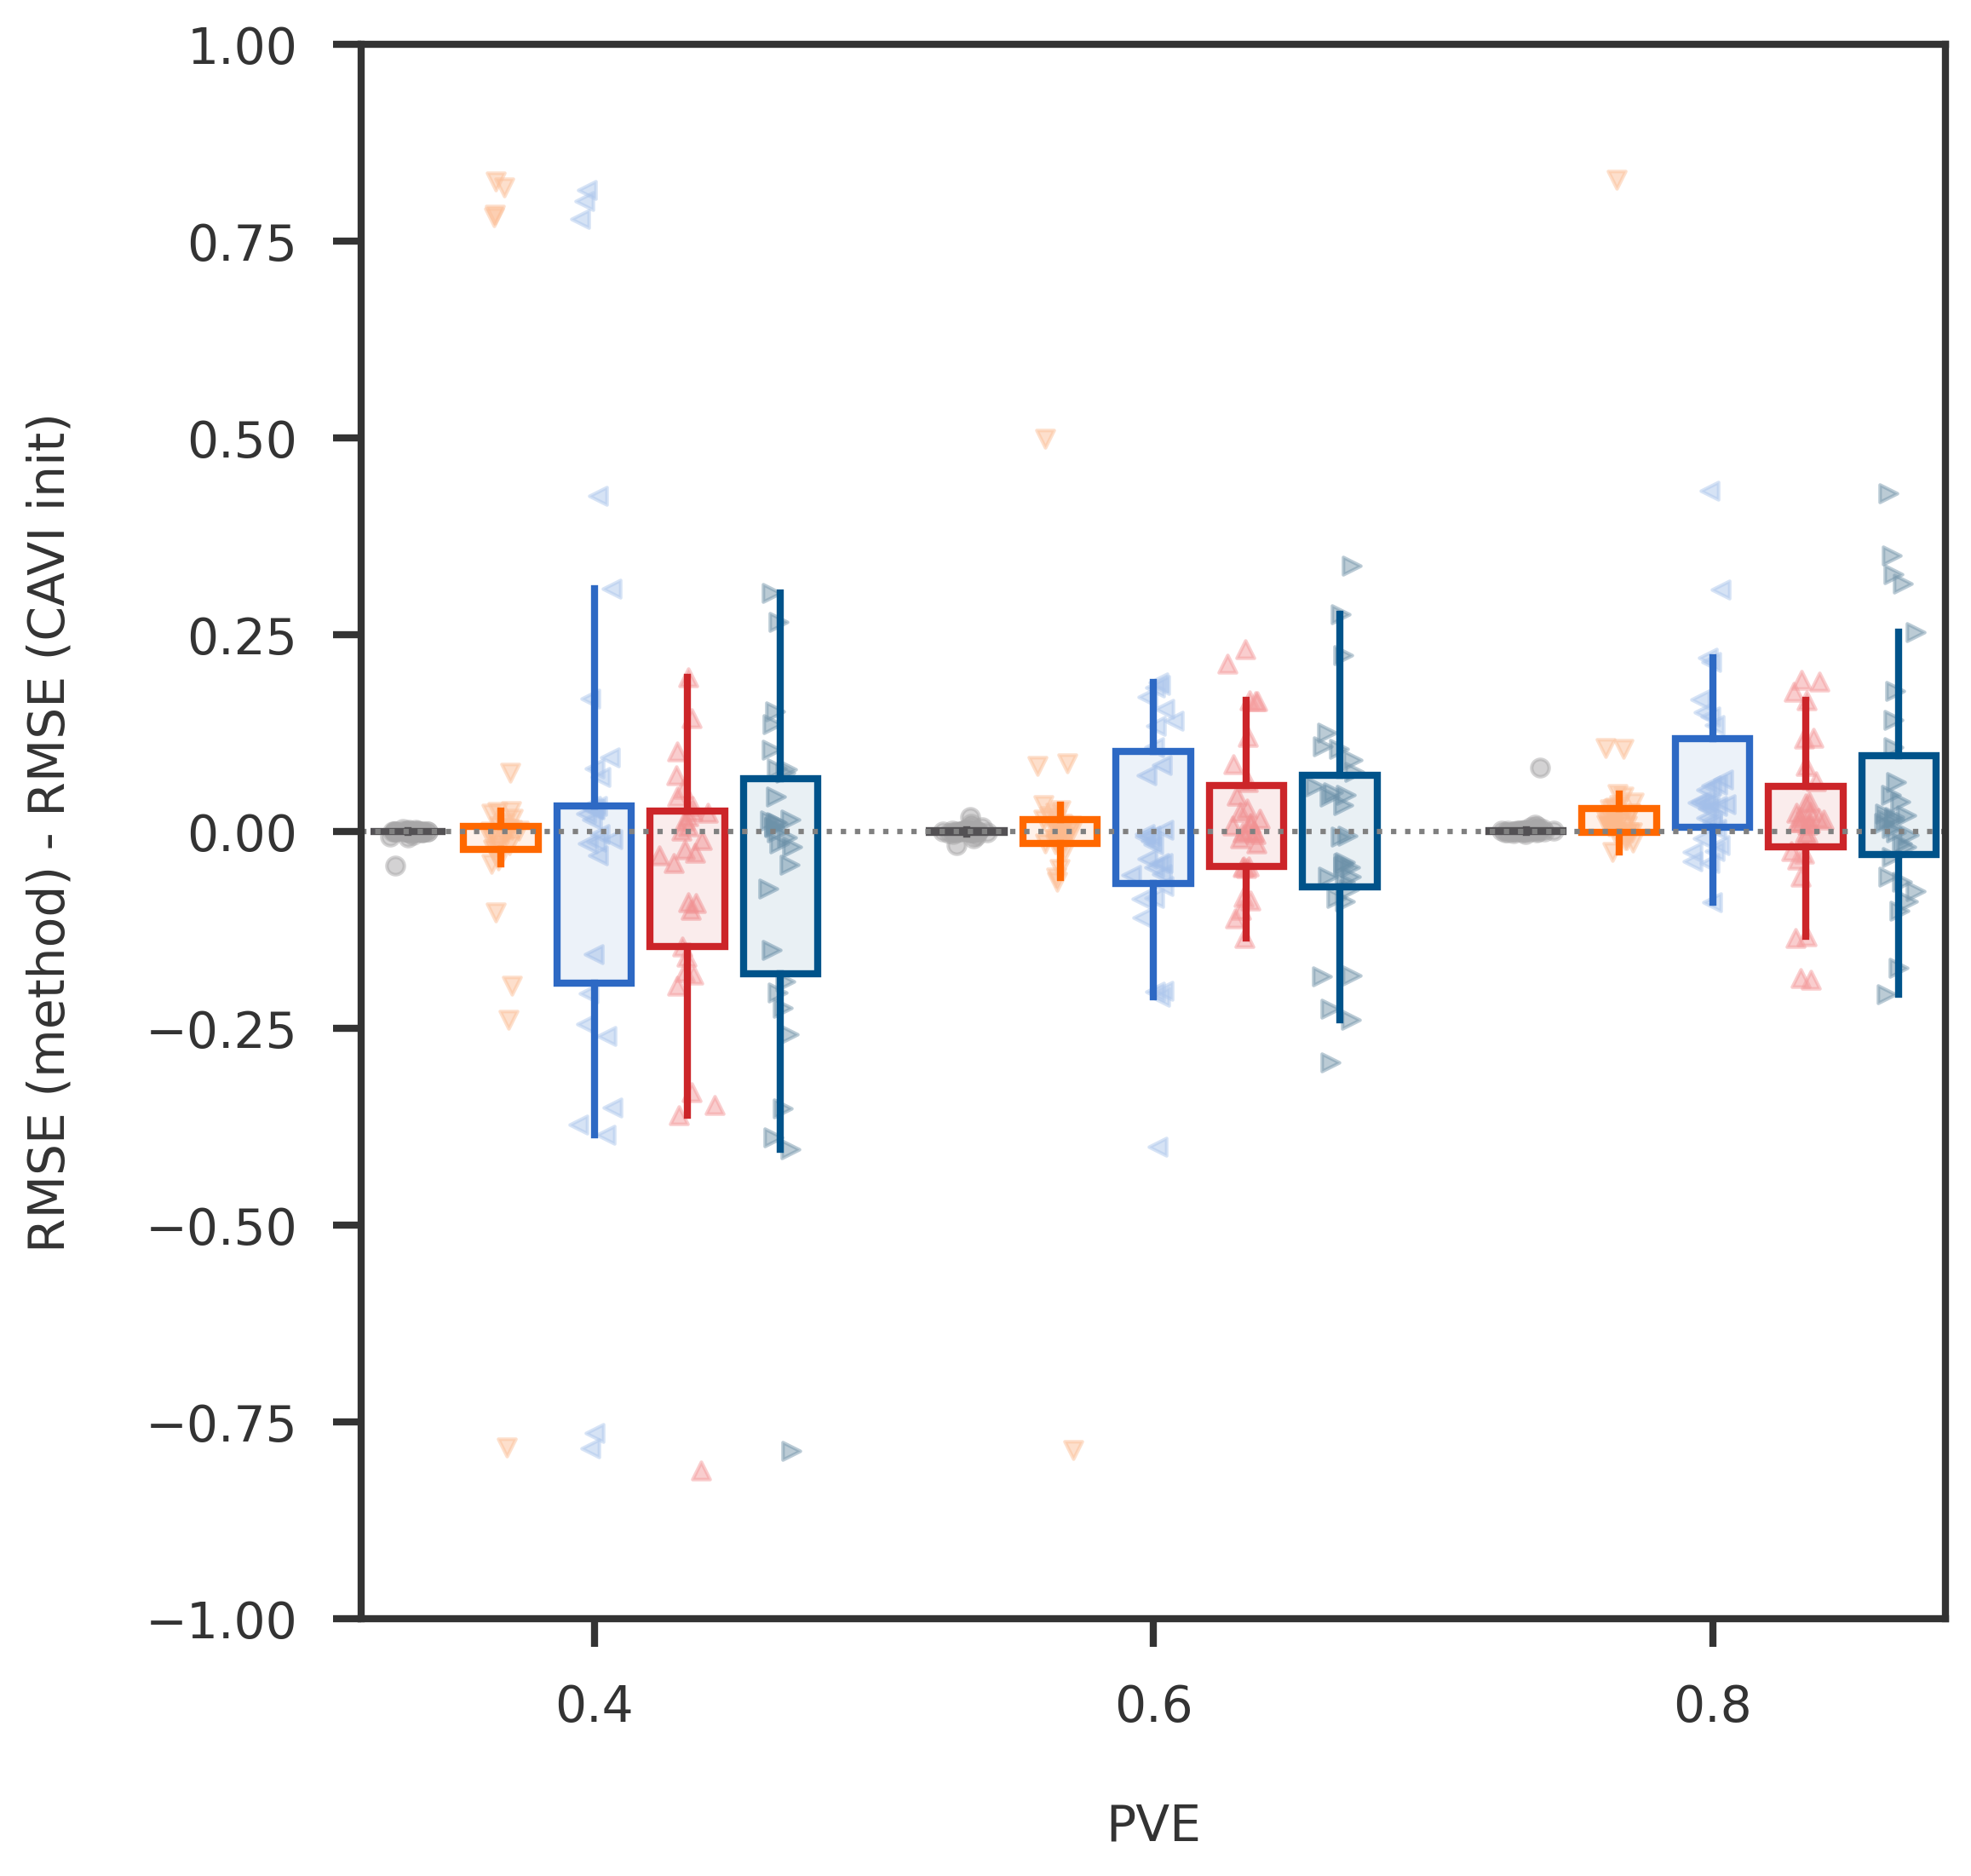

In [8]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

plotprefix = "indep_rmse_comparison_boxplot"
ylim = [-1, 1]

fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)
remove_outliers = True

df = utils.pivot_simulation_stat(sparse_indep_df, 'mse')
dfmod = df.copy(deep = True)
dfmod[reference] = np.sqrt(dfmod[reference])
for target in targets:
    dfmod[target] = 100 * (np.sqrt(dfmod[target]) - dfmod[reference]) / dfmod[reference]

outlier_factor = [10. for x in targets]
# outlier_factor[0] = 0.8
# outlier_factor[1] = 0.4
# outlier_factor[2] = 0.9
outliers = fplot.compare_methods_with_boxplots(ax1, dfmod, targets, outlier_factor = outlier_factor, ylim = ylim)

ax1.axhline(y = 0, linestyle = 'dotted', color = 'gray')
ax1.set_ylabel("RMSE (method) - RMSE (CAVI init)")
ax1.set_xlabel("PVE")
ax1.set_ylim(ylim)
ax1.axhline(y = 10.5)

utils.saveplot(fig, plotprefix)
plt.show()

# Number of iterations

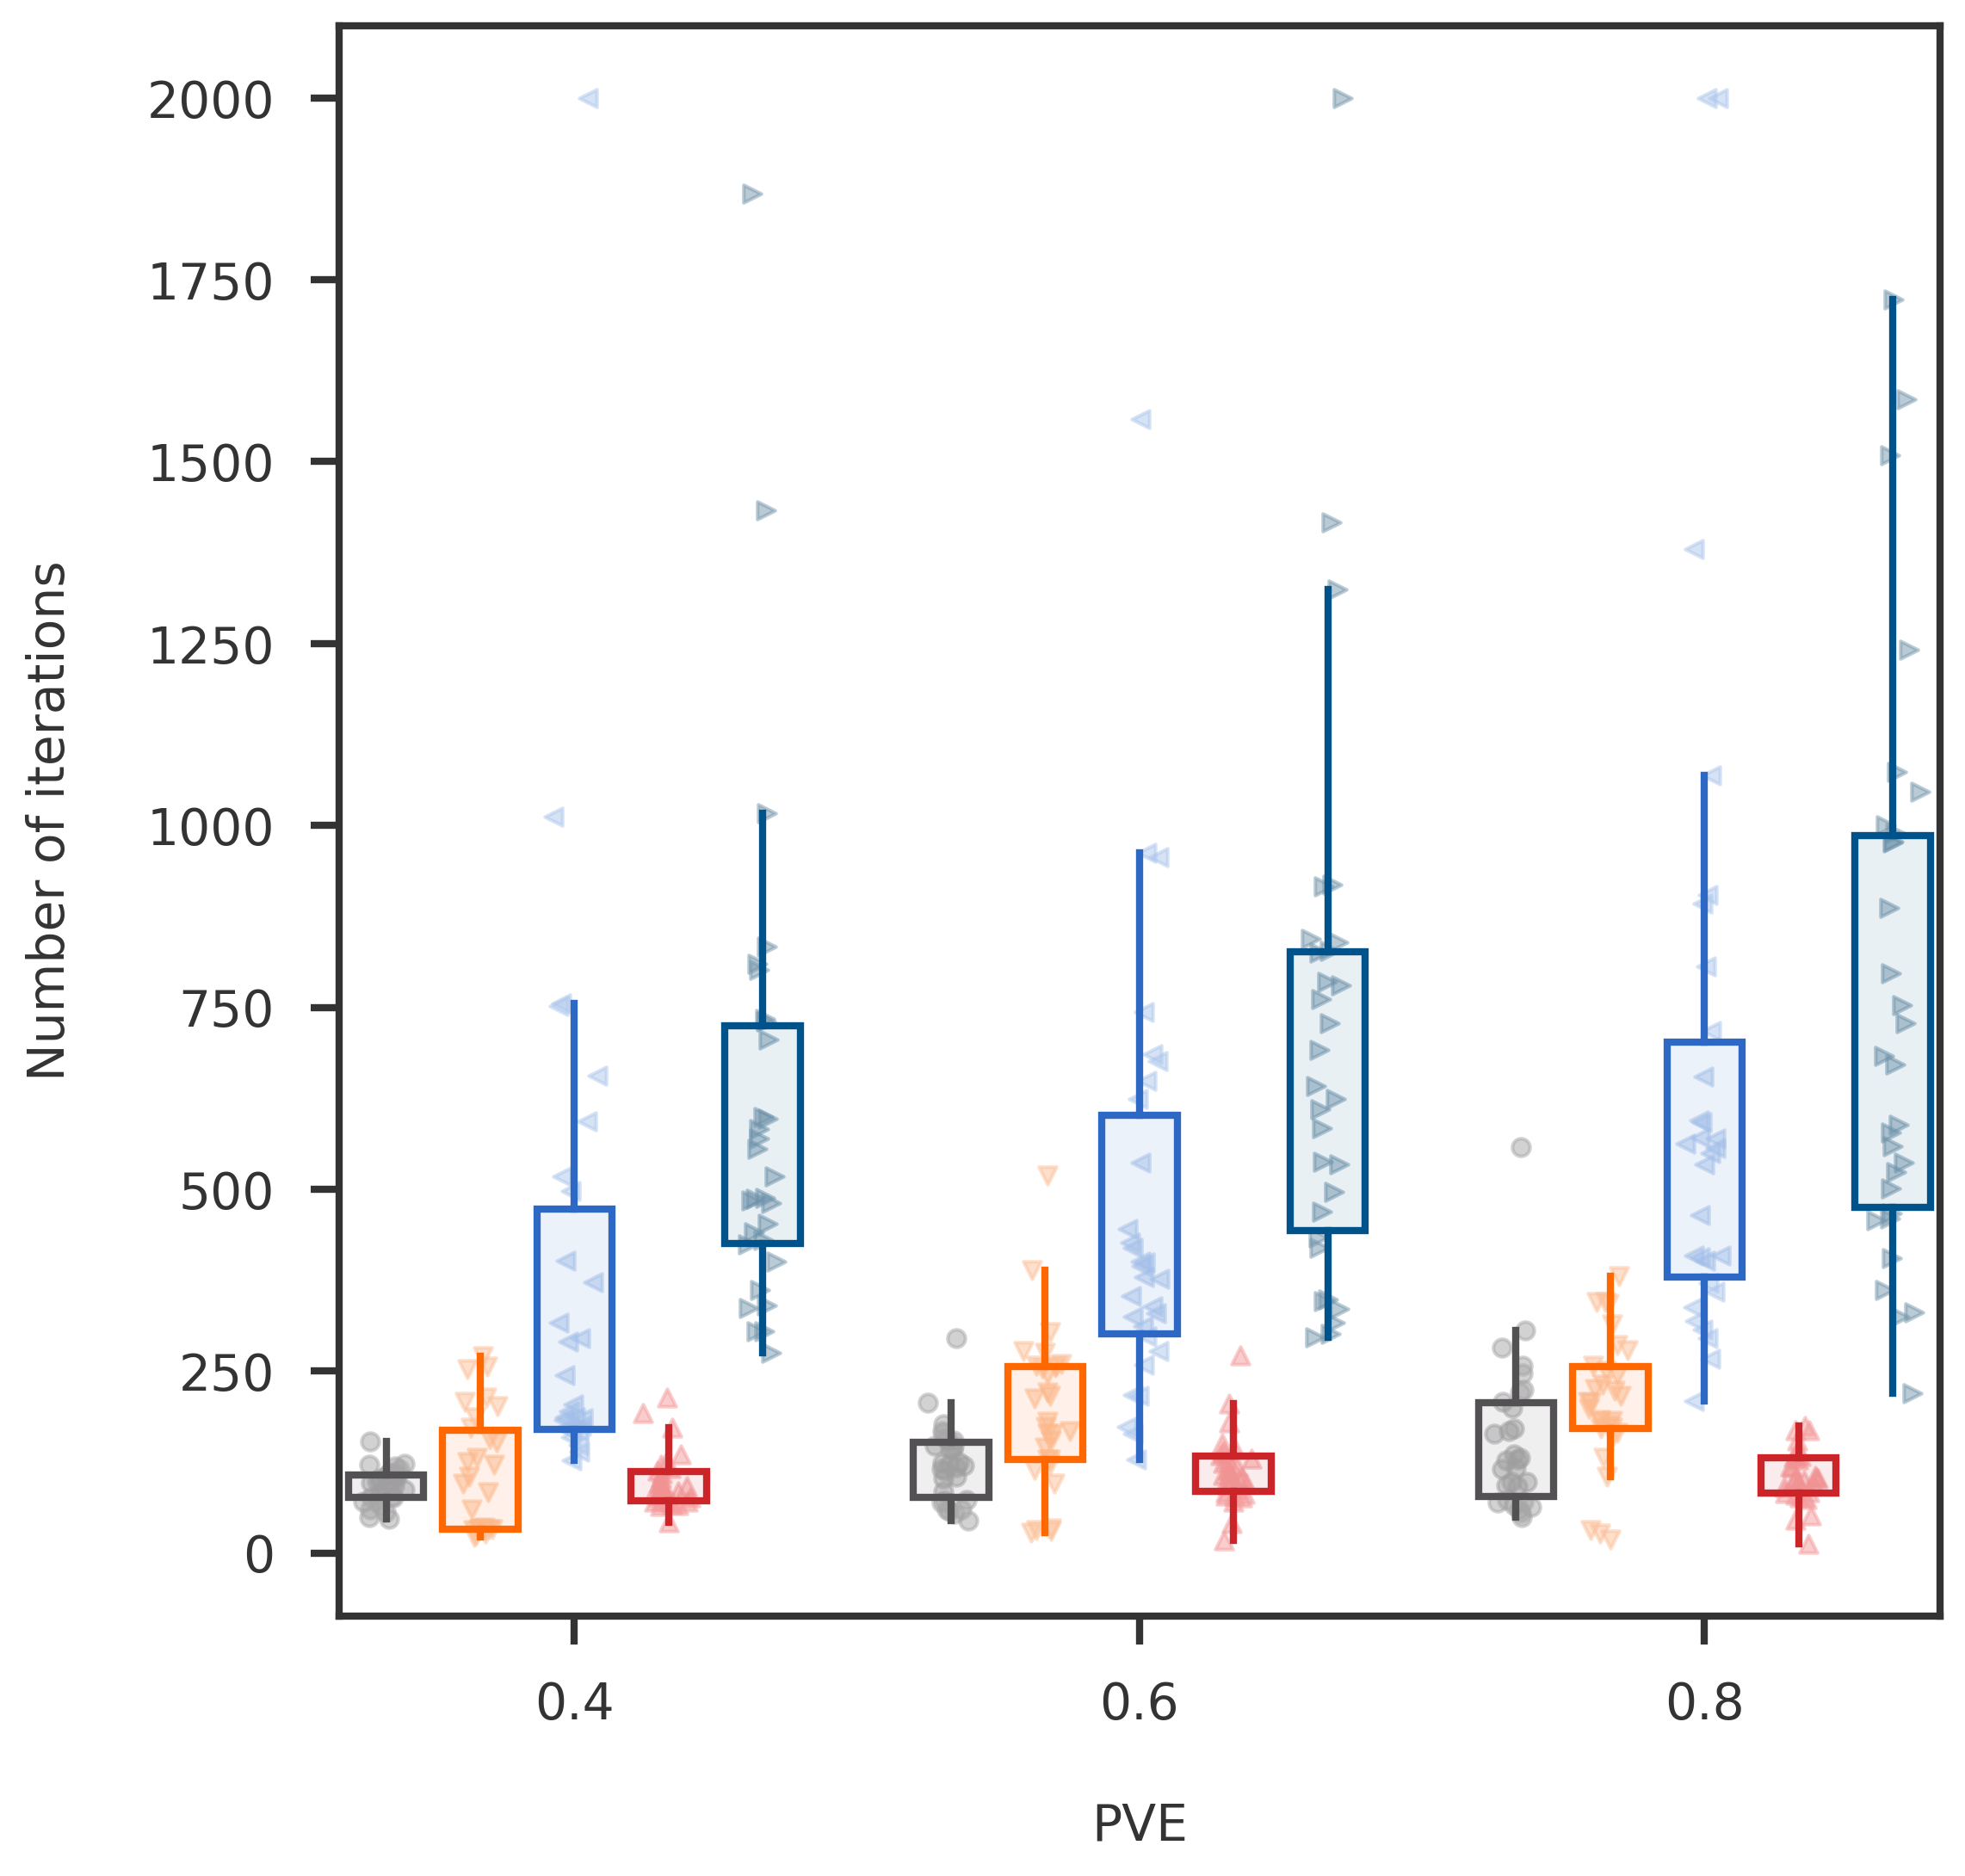

In [7]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)
plotprefix = "blockdiag_niter_comparison_boxplot"

fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)

df = utils.pivot_simulation_stat(sparse_blockdiag_df, 'niter')
targets_mod = targets.copy()
targets_mod[0] = "mr_ash_lasso_init"
outliers = fplot.compare_methods_with_boxplots(ax1, df, targets_mod, remove_outliers = False, is_truncate = False)

ax1.set_ylabel("Number of iterations")
ax1.set_xlabel("PVE")
ax1.set_ylim(ylim)

utils.saveplot(fig, plotprefix)
plt.show()

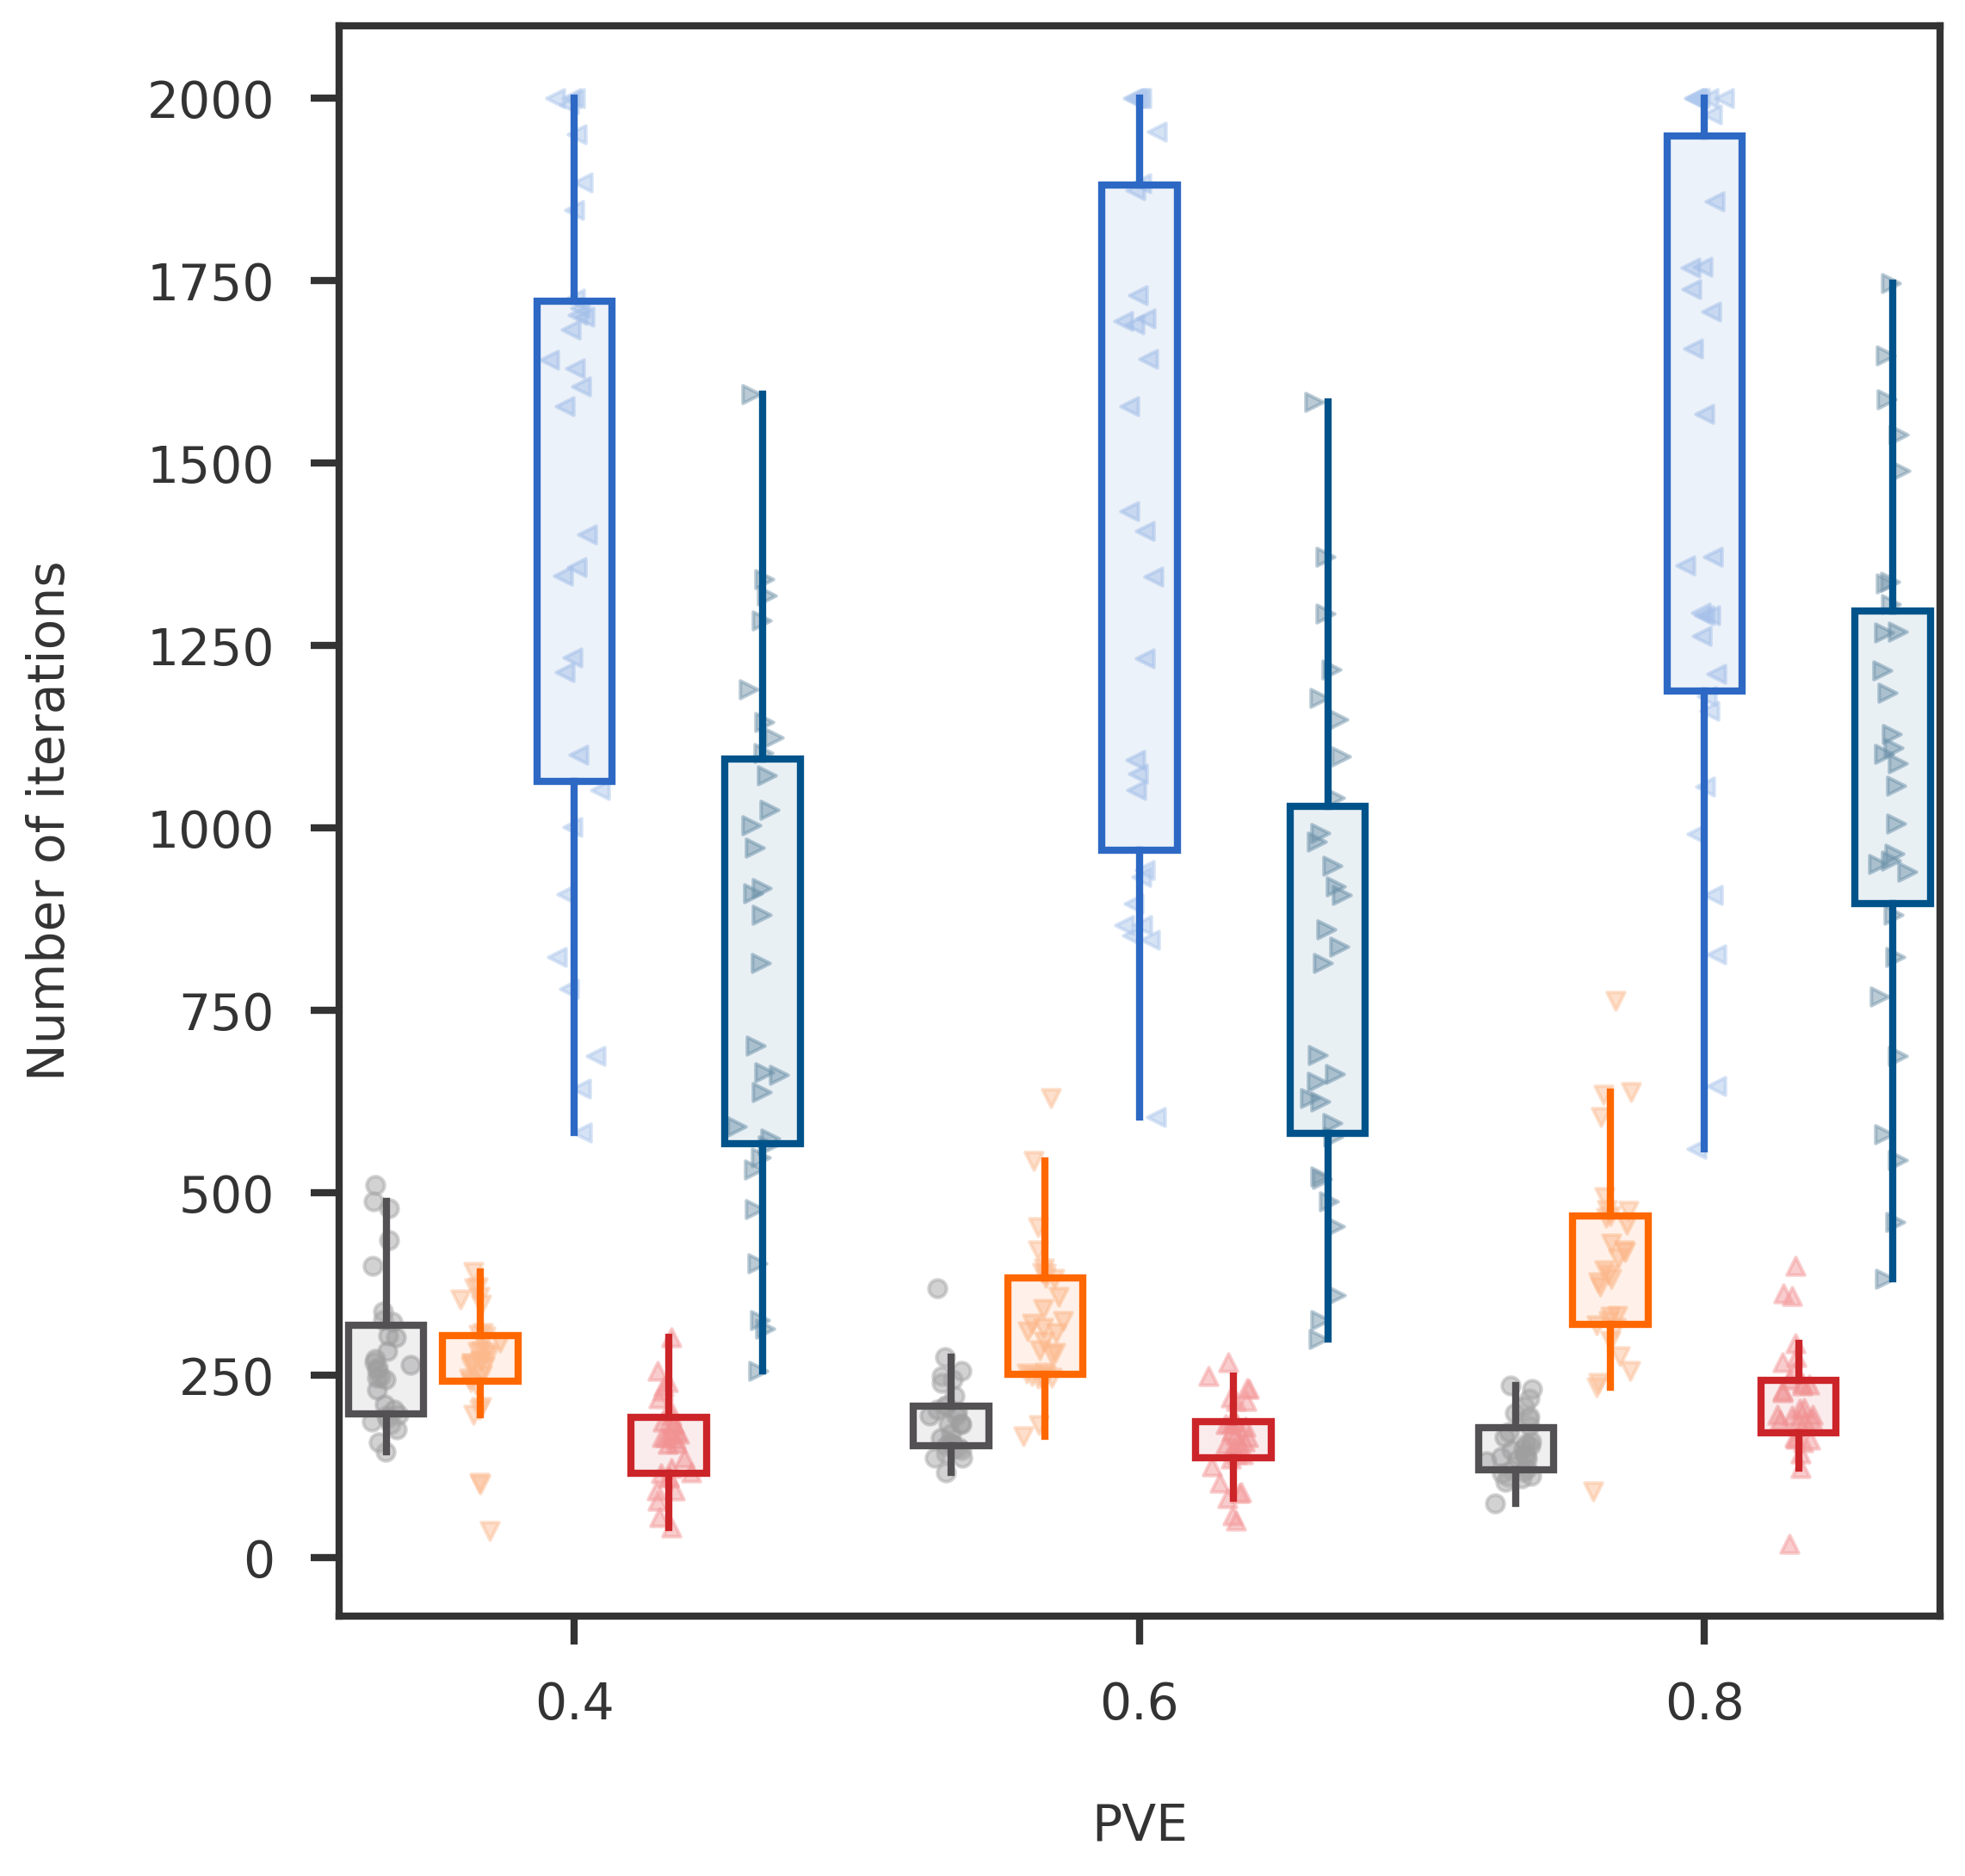

In [8]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)
plotprefix = "indep_niter_comparison_boxplot"

fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)

df = utils.pivot_simulation_stat(sparse_indep_df, 'niter')
targets_mod = targets.copy()
targets_mod[0] = "mr_ash_lasso_init"
outliers = fplot.compare_methods_with_boxplots(ax1, df, targets_mod, remove_outliers = False, is_truncate = False)

ax1.set_ylabel("Number of iterations")
ax1.set_xlabel("PVE")
ax1.set_ylim(ylim)

utils.saveplot(fig, plotprefix)
plt.show()

# Runtime

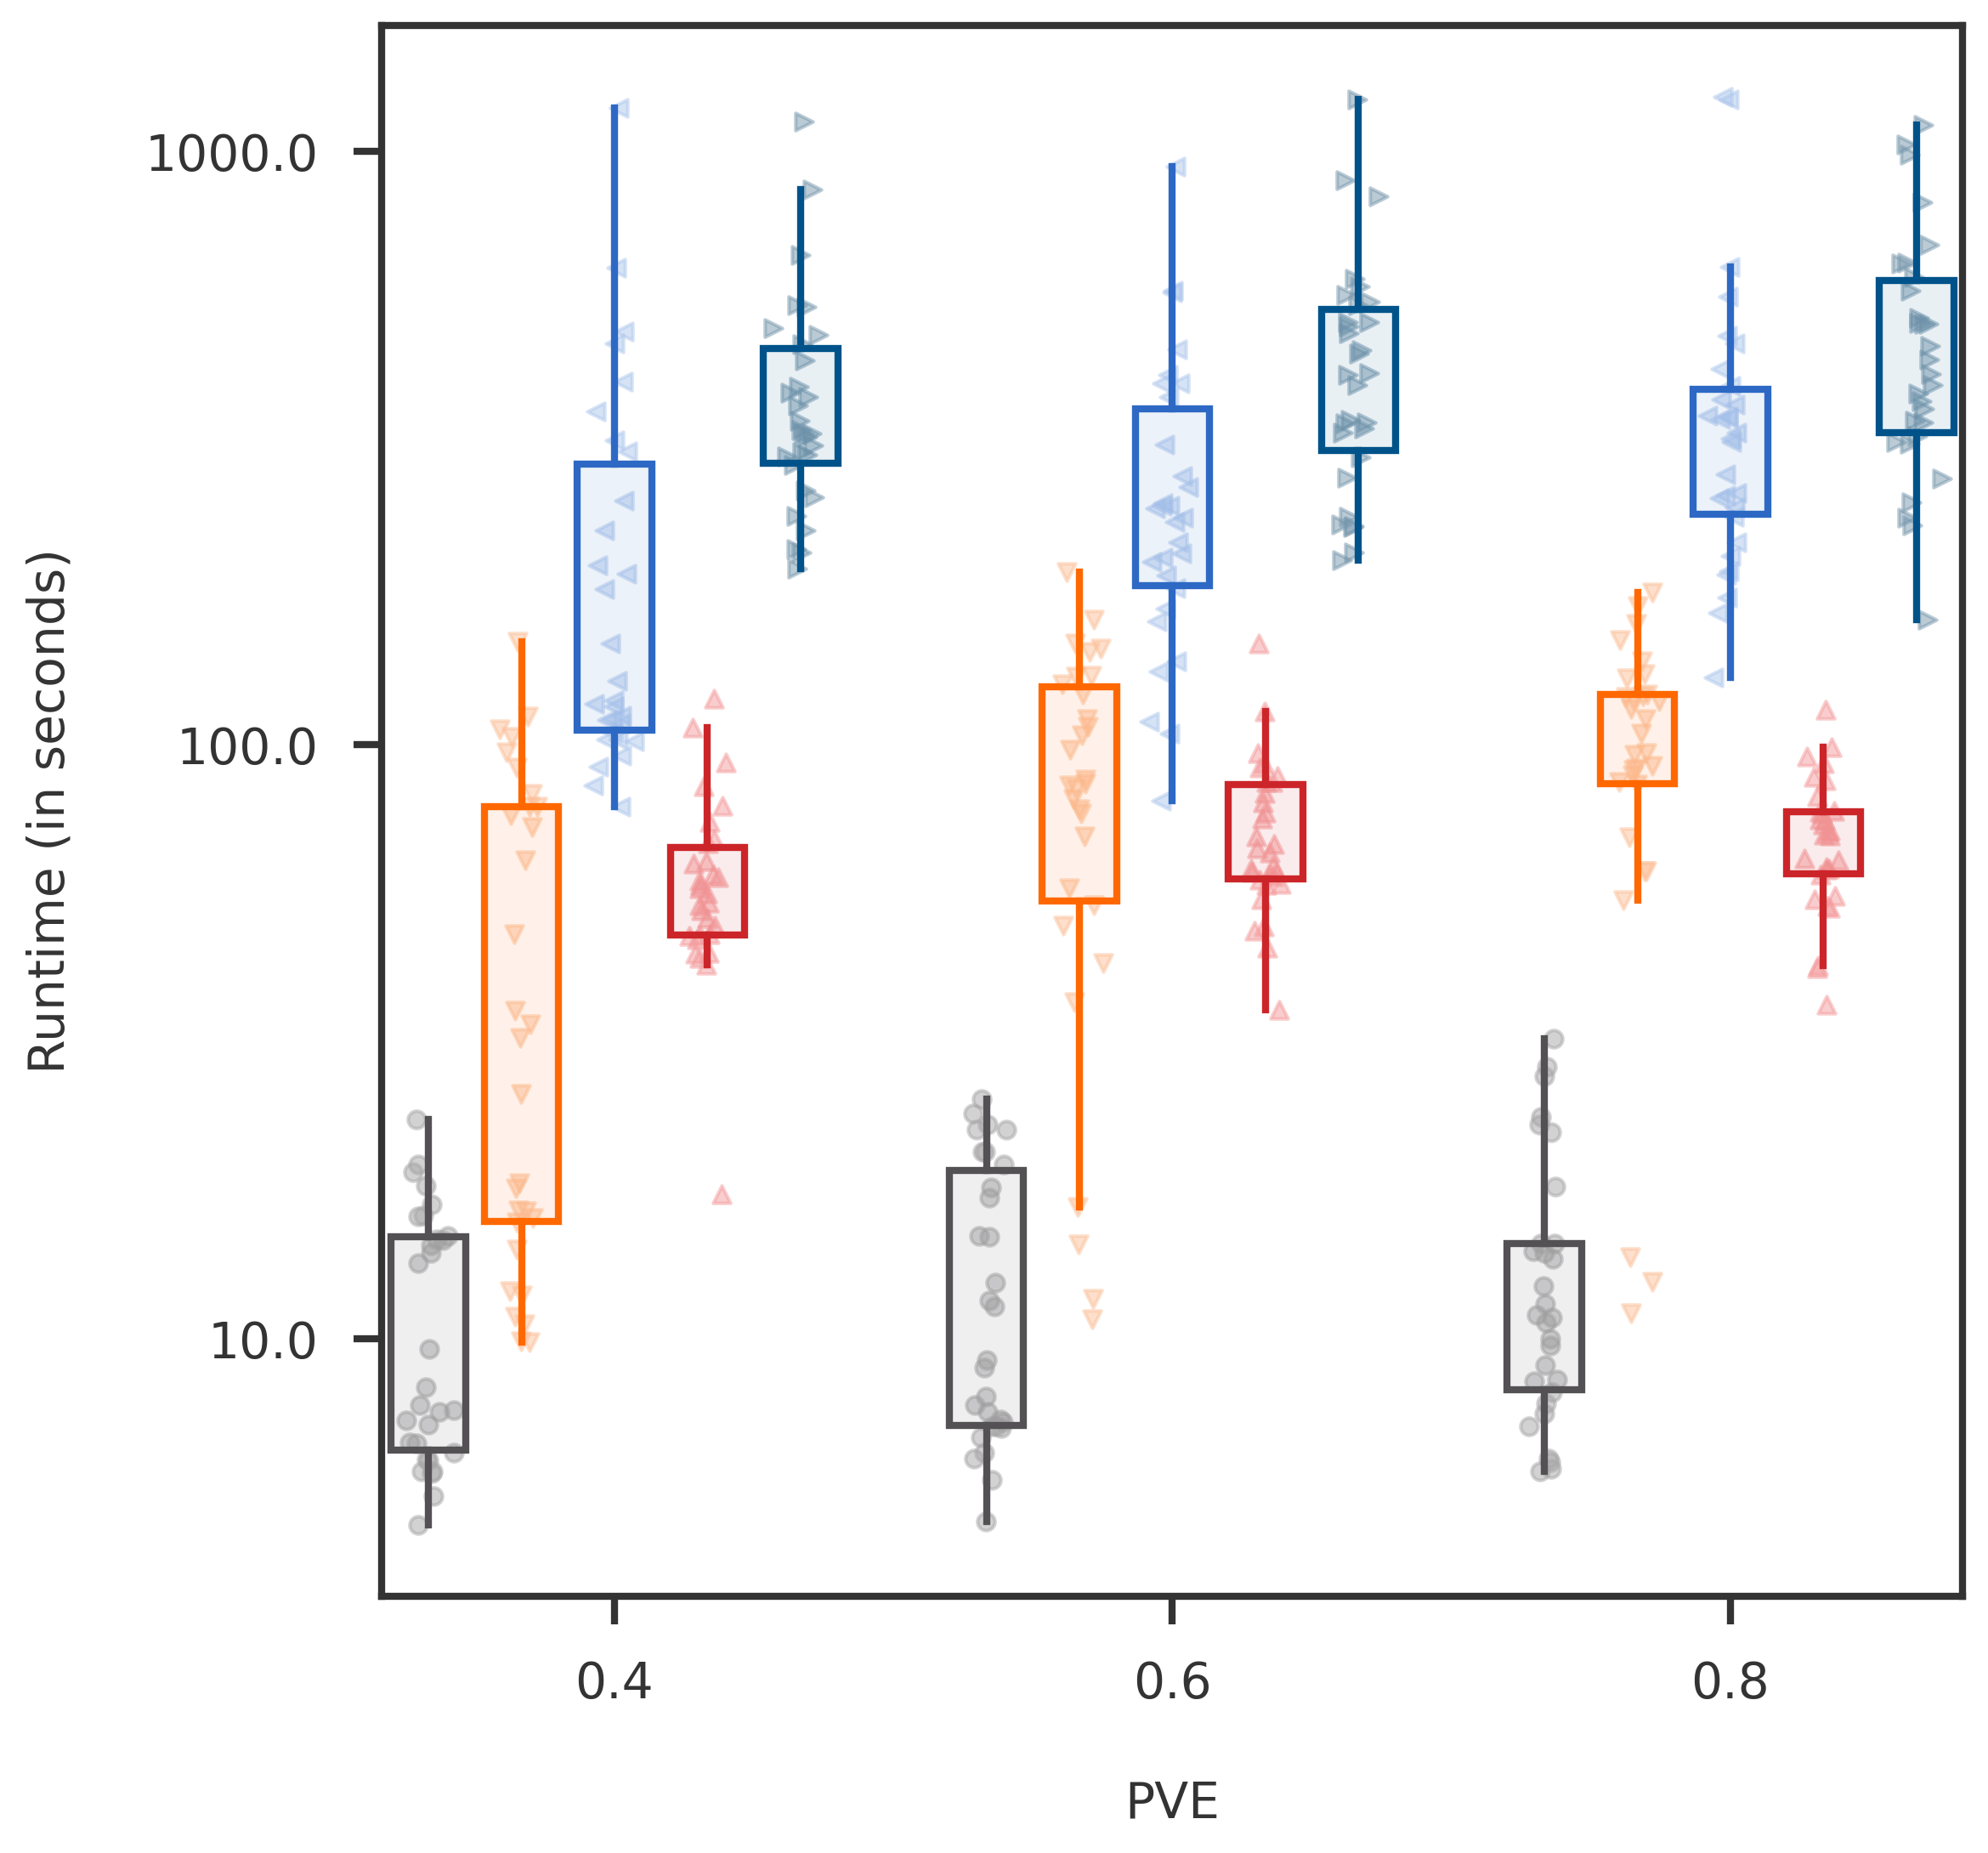

In [22]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)
plotprefix = "blockdiag_runtime_comparison_boxplot"

fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)

df = utils.pivot_simulation_stat(sparse_blockdiag_df, 'runtime_wall')
dfmod = df.copy()
for target in targets_mod:
    dfmod[target] = np.log10(dfmod[target])
    

outliers = fplot.compare_methods_with_boxplots(ax1, dfmod, targets, remove_outliers = False, is_truncate = False)

ax1.set_ylabel("Runtime (in seconds)")
ax1.set_xlabel("PVE")
ax1.set_ylim(ylim)

mpl_utils.set_yticks(ax1, scale = 'log10', spacing = 'log10')
utils.saveplot(fig, plotprefix)
plt.show()

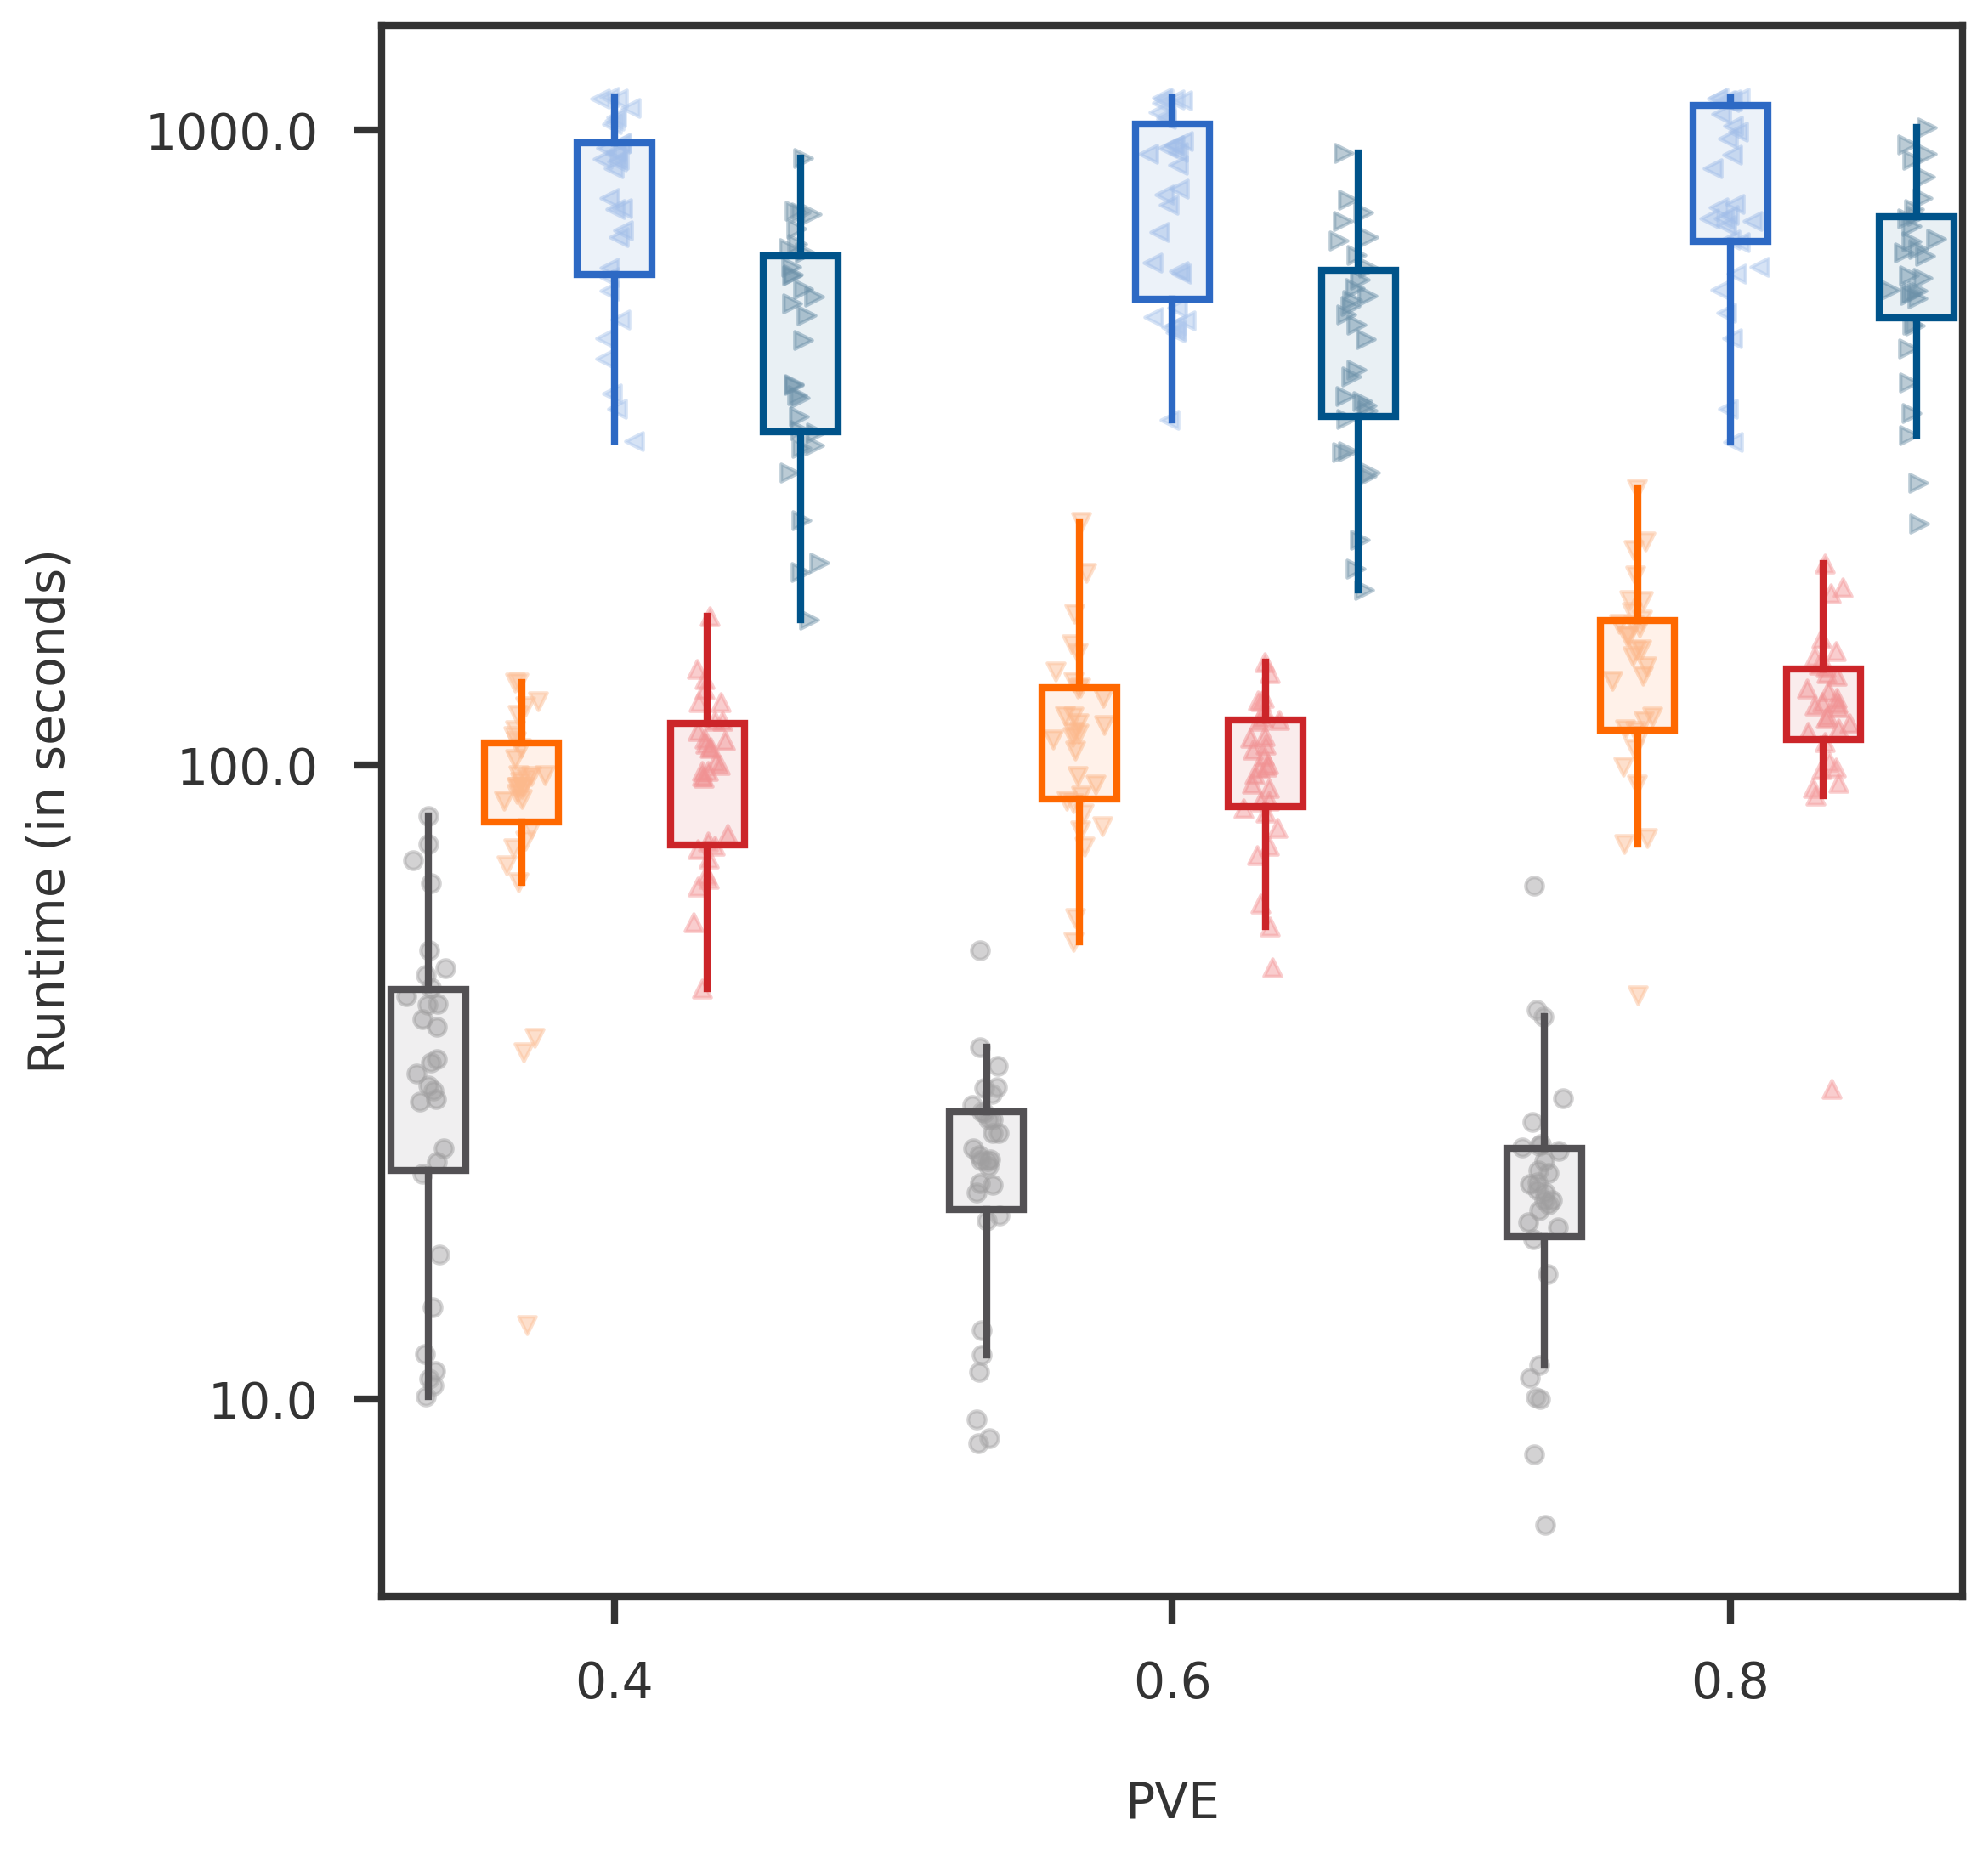

In [23]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)
plotprefix = "indep_runtime_comparison_boxplot"

fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(111)

df = utils.pivot_simulation_stat(sparse_indep_df, 'runtime_wall')
dfmod = df.copy()
for target in targets_mod:
    dfmod[target] = np.log10(dfmod[target])
    

outliers = fplot.compare_methods_with_boxplots(ax1, dfmod, targets, remove_outliers = False, is_truncate = False)

ax1.set_ylabel("Runtime (in seconds)")
ax1.set_xlabel("PVE")
ax1.set_ylim(ylim)

mpl_utils.set_yticks(ax1, scale = 'log10', spacing = 'log10')
utils.saveplot(fig, plotprefix)
plt.show()